In [ ]:
#This will be the Clastone Final Project. In this notebook i will analyse the accident data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [ ]:
#Import the dataset

In [2]:
dataset=r"https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df_1=pd.read_csv(dataset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_1.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df=df_1[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']]
df_map=df_1[['SEVERITYCODE','ADDRTYPE','X', 'Y']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
SEVERITYCODE      194673 non-null int64
SEVERITYDESC      194673 non-null object
ADDRTYPE          192747 non-null object
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null object
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null object
WEATHER           189592 non-null object
ROADCOND          189661 non-null object
LIGHTCOND         189503 non-null object
SPEEDING          9333 non-null object
HITPARKEDCAR      194673 non-null object
dtypes: int64(1), object(12)
memory usage: 19.3+ MB


In [6]:
df.replace("?", np.nan, inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [7]:
df.isnull().head(6)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
#Preprocessing the Data

In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("   ")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
   
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
   
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
   
INCDATE
False    194673
Name: INCDATE, dtype: int64
   
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
   
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
   
INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
   
UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64
   
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
   
ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64
   
LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64
   
SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64
   
HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64
   


In [9]:
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [10]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    96138
At-Intersection                            64908
Mid-Block (but intersection related)       22790
RampDriveway                               10837
Name: JUNCTIONTYPE, dtype: int64

In [11]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [12]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear       116216
RainSnow     34815
Overcast     27719
Unknown      15923
Name: WEATHER, dtype: int64

In [13]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

In [14]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [15]:
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     194673
unique         2
top            N
freq      164868
Name: INATTENTIONIND, dtype: object

In [16]:
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

count     194673
unique         2
top            N
freq      185340
Name: SPEEDING, dtype: object

In [17]:
df["SEVERITYDESC"].describe()

count                             194673
unique                                 2
top       Property Damage Only Collision
freq                              136485
Name: SEVERITYDESC, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
SEVERITYCODE      194673 non-null int64
SEVERITYDESC      194673 non-null object
ADDRTYPE          194673 non-null object
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      194673 non-null object
INATTENTIONIND    194673 non-null object
UNDERINFL         194673 non-null int64
WEATHER           194673 non-null object
ROADCOND          194673 non-null object
LIGHTCOND         194673 non-null object
SPEEDING          194673 non-null object
HITPARKEDCAR      194673 non-null object
dtypes: int64(2), object(11)
memory usage: 19.3+ MB


In [19]:
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(189339, 4)

In [20]:
df.dtypes

SEVERITYCODE       int64
SEVERITYDESC      object
ADDRTYPE          object
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
INATTENTIONIND    object
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
HITPARKEDCAR      object
dtype: object

In [21]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
df.dtypes

SEVERITYCODE                    int64
SEVERITYDESC                   object
ADDRTYPE                       object
INCDATE           datetime64[ns, UTC]
INCDTTM                datetime64[ns]
JUNCTIONTYPE                   object
INATTENTIONIND                 object
UNDERINFL                       int64
WEATHER                        object
ROADCOND                       object
LIGHTCOND                      object
SPEEDING                       object
HITPARKEDCAR                   object
dtype: object

In [23]:
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,hourofday,dayofweek
0,2,Injury Collision,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At-Intersection,N,0,Overcast,Wet,Daylight,N,N,14,2
1,1,Property Damage Only Collision,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,0,RainSnow,Wet,Dark-With-Light,N,N,18,2
2,1,Property Damage Only Collision,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,10,3
3,1,Property Damage Only Collision,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N,9,4
4,2,Injury Collision,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At-Intersection,N,0,RainSnow,Wet,Daylight,N,N,8,2


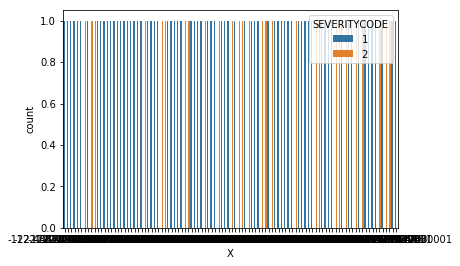

In [24]:
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [25]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,X,X-binned
0,-122.323148,Medium
1,-122.347294,Medium
2,-122.334540,Medium
3,-122.334803,Medium
4,-122.306426,Medium
5,-122.387598,Low
6,-122.338485,Medium
7,-122.320780,Medium
8,-122.335930,Medium
9,-122.384700,Low


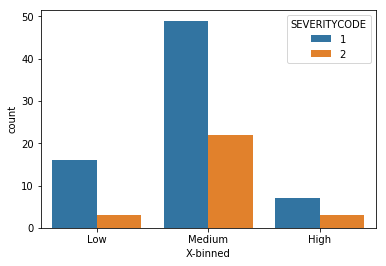

In [26]:
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")

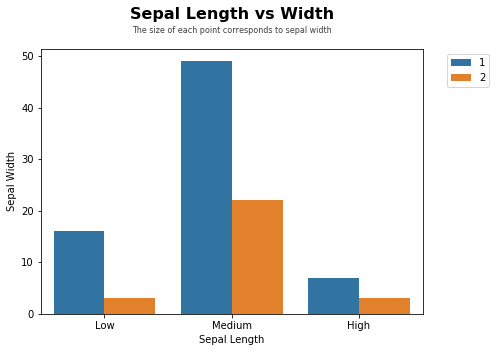

In [27]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE", ax=ax)

# make adjustments
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

In [28]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

,AddType-Block,AddType-Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection
0,2,Intersection,-122.323148,47.703140,Medium,0,1
1,1,Block,-122.347294,47.647172,Medium,1,0
2,1,Block,-122.334540,47.607871,Medium,1,0
3,1,Block,-122.334803,47.604803,Medium,1,0
4,2,Intersection,-122.306426,47.545739,Medium,0,1


In [30]:
df.describe()

,SEVERITYCODE,UNDERINFL,hourofday,dayofweek
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,0.046853,11.167106,2.938728
std,0.457778,0.211324,7.075297,1.921549
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,6.000000,1.000000
50%,1.000000,0.000000,12.000000,3.000000
75%,2.000000,0.000000,17.000000,5.000000
max,2.000000,1.000000,23.000000,6.000000


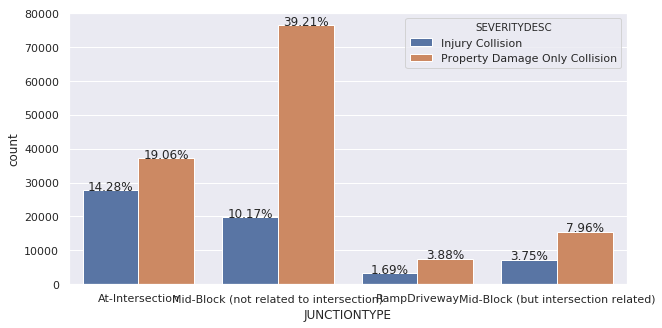

In [31]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

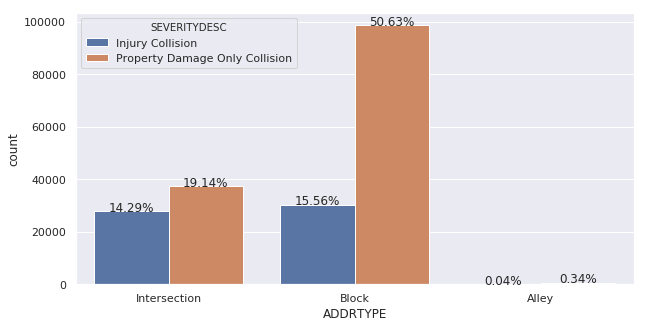

In [32]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

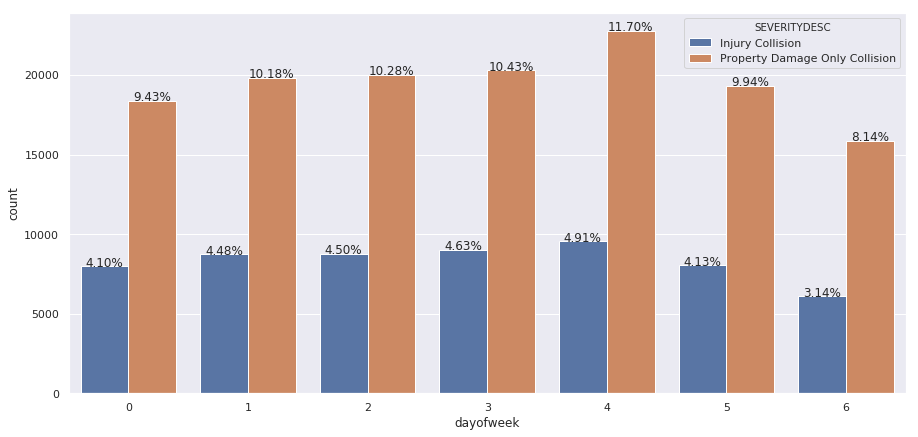

In [33]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


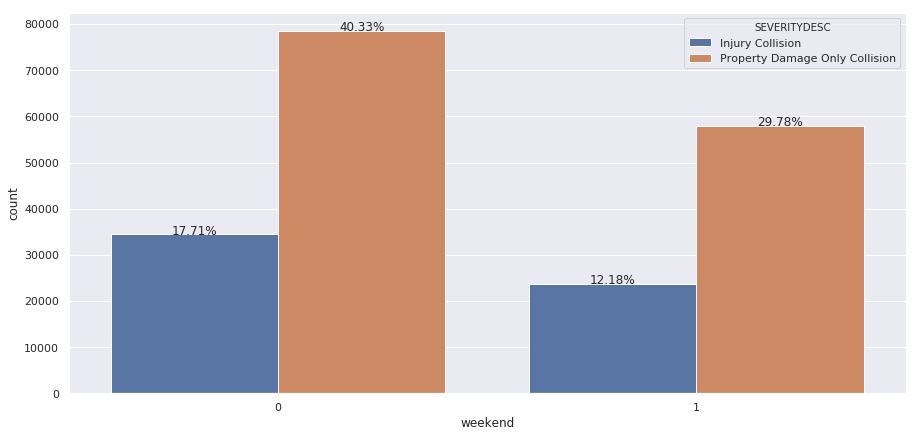

In [34]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

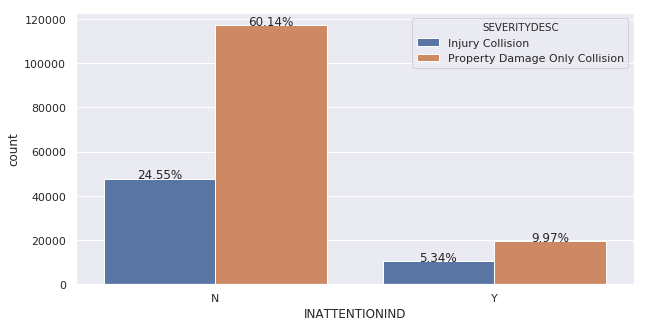

In [35]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

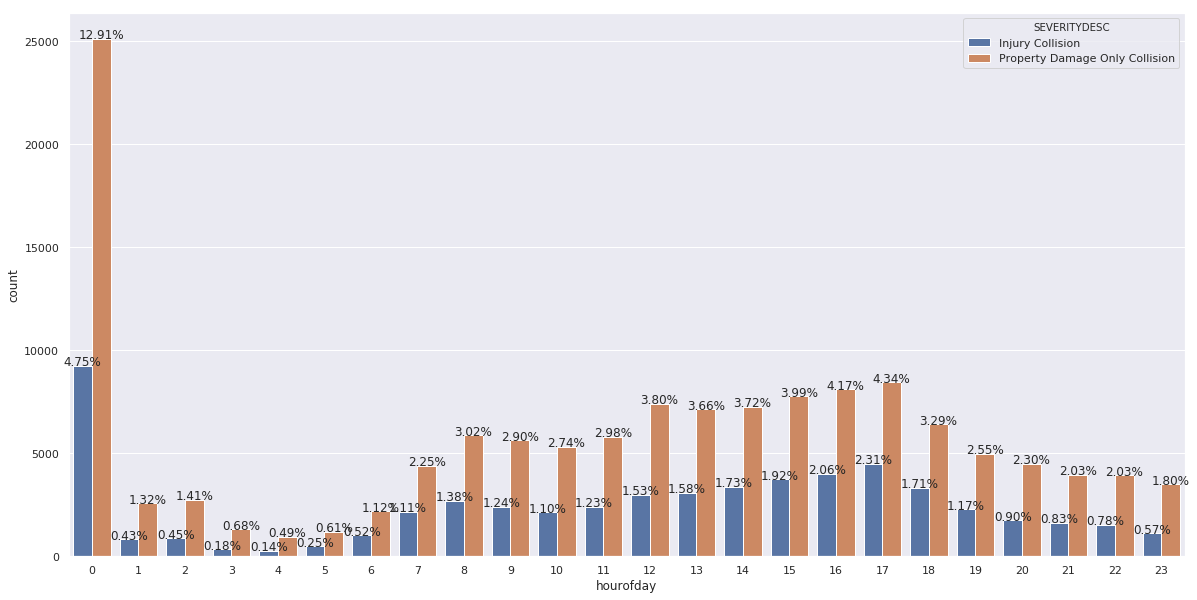

In [38]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


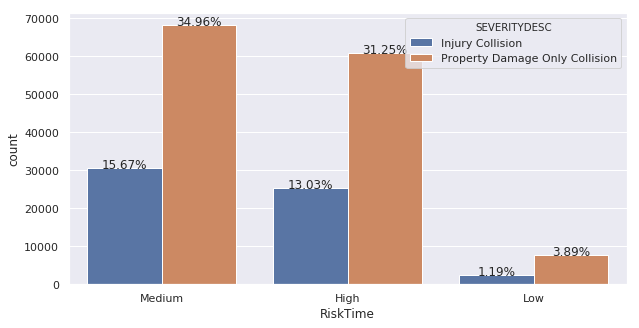

In [37]:
df['RiskTime'] = df['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

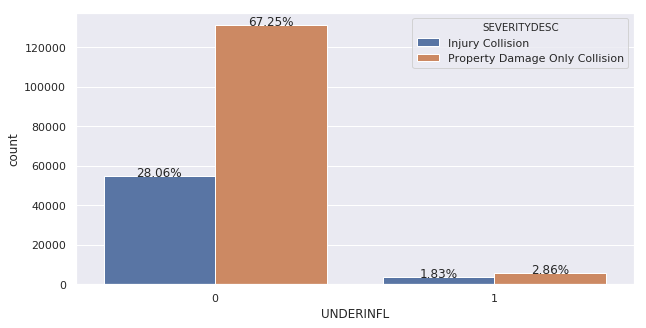

In [39]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

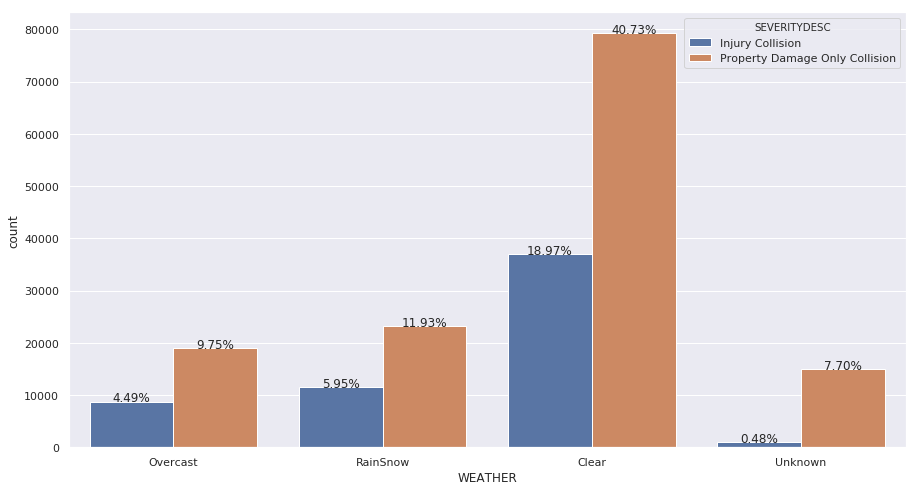

In [40]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

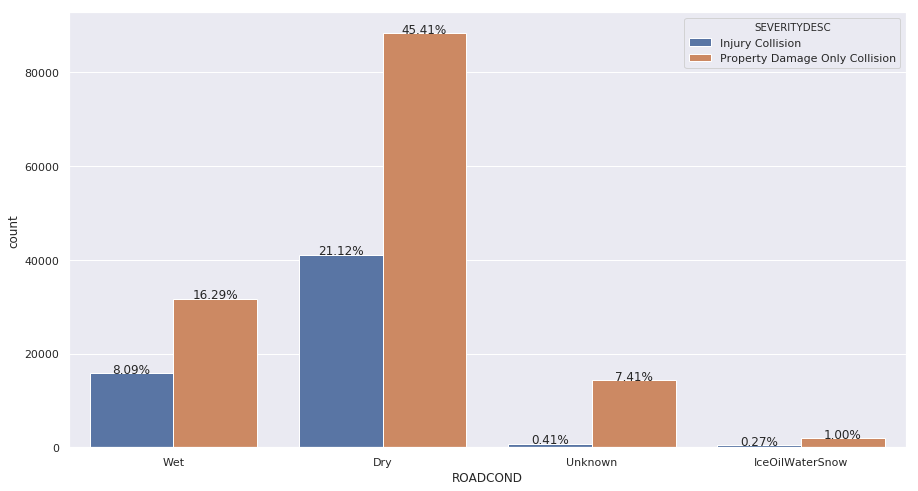

In [41]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

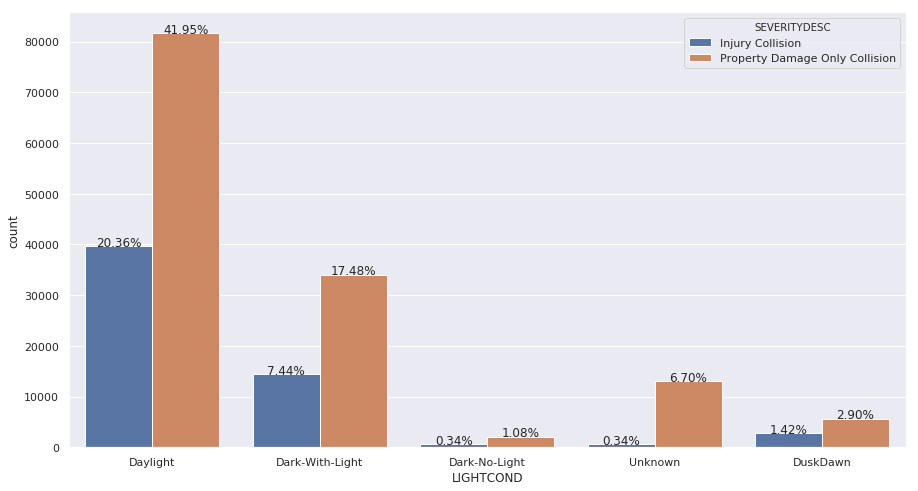

In [42]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

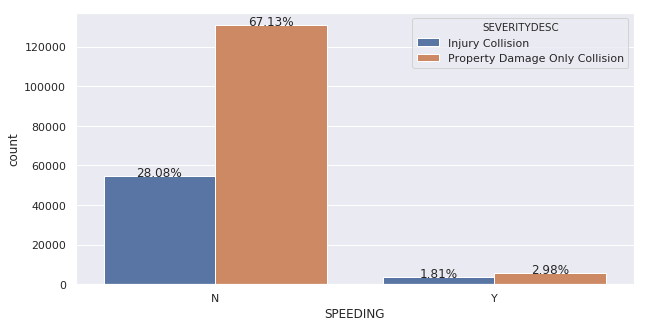

In [43]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

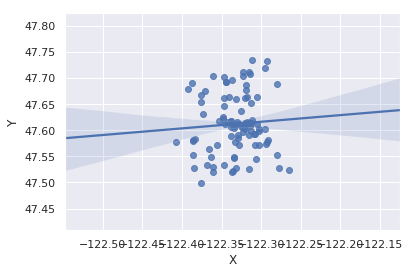

In [44]:
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

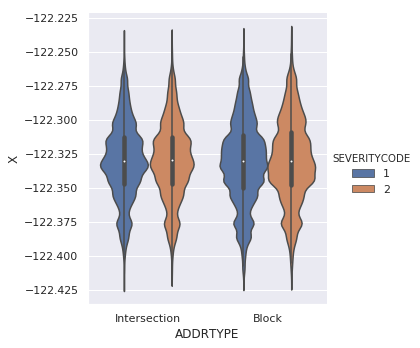

In [45]:
sns.catplot(x="ADDRTYPE", y="X", hue="SEVERITYCODE",data=df_map, kind="violin")
plt.show()

In [46]:
df.describe(include=['object'])

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,RiskTime
count,194673,194673,194673,194673,194673,194673,194673,194673,194673,194673
unique,2,3,4,2,4,4,5,2,2,3
top,Property Damage Only Collision,Block,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,N,Medium
freq,136485,128852,96138,164868,116216,129522,121307,185340,187457,98559


In [47]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [48]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [49]:
df_gptest = df[['hourofday','ADDRTYPE','SEVERITYCODE']]
grouped_test1 = df_gptest.groupby(['hourofday','ADDRTYPE'],as_index=False).mean()
grouped_test1

,hourofday,ADDRTYPE,SEVERITYCODE
0,0,Alley,1.124183
1,0,Block,1.216787
2,0,Intersection,1.391905
3,1,Alley,1.052632
4,1,Block,1.196220
5,1,Intersection,1.379157
6,2,Alley,1.040000
7,2,Block,1.198075
8,2,Intersection,1.379545
9,3,Alley,1.142857


In [50]:
grouped_pivot = grouped_test1.pivot(index='ADDRTYPE',columns='hourofday')
grouped_pivot

SEVERITYCODE                                                    \
hourofday              0         1         2         3         4         5    
ADDRTYPE                                                                      
Alley            1.124183  1.052632  1.040000  1.142857  1.000000  1.333333   
Block            1.216787  1.196220  1.198075  1.172387  1.181435  1.230241   
Intersection     1.391905  1.379157  1.379545  1.341463  1.370370  1.441296   

                                                      ...                      \
hourofday           6         7         8         9   ...        14        15   
ADDRTYPE                                              ...                       
Alley         1.333333  1.166667  1.096774  1.071429  ...  1.071429  1.136364   
Block         1.236817  1.241329  1.260768  1.225813  ...  1.252028  1.260887   
Intersection  1.470270  1.477636  1.415385  1.434524  ...  1.437236  1.443081   

                                                                          \
hourofday           16        17        18        19        20        21   
ADDRTYPE                                                                   
Alley         1.176471  1.031250  1.107143  1.166667  1.107143  1.047619   
Block         1.270599  1.280489  1.267129  1.237556  1.208039  1.219358   
Intersection  1.436065  1.464979  1.476082  1.459725  1.424631  1.428797   

                                  
hourofday           22        23  
ADDRTYPE                          
Alley         1.086957  1.107143  
Block         1.215426  1.181984  
Intersection  1.415429  1.393468  

[3 rows x 24 columns]

In [51]:
df_map["geom"] = df_map["Y"].map(str) + "," + df_map["X"].map(str)
df_map.head()

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection,geom
0,2,Intersection,-122.323148,47.703140,Medium,0,1,"47.70314032,-122.32314840000002"
1,1,Block,-122.347294,47.647172,Medium,1,0,"47.64717249,-122.3472943"
2,1,Block,-122.334540,47.607871,Medium,1,0,"47.60787143,-122.33453999999999"
3,1,Block,-122.334803,47.604803,Medium,1,0,"47.60480289,-122.3348033"
4,2,Intersection,-122.306426,47.545739,Medium,0,1,"47.54573946,-122.3064263"


In [52]:
df.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'ADDRTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR', 'hourofday', 'dayofweek',
       'weekend', 'RiskTime'],
      dtype='object')

In [53]:
df.isnull().any()

SEVERITYCODE      False
SEVERITYDESC      False
ADDRTYPE          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE      False
INATTENTIONIND    False
UNDERINFL         False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
hourofday         False
dayofweek         False
weekend           False
RiskTime          False
dtype: bool

In [54]:
y = df["SEVERITYCODE"]

In [55]:
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND','LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:5]

array([['Intersection', 'At-Intersection', 'N', 0, 'Overcast', 'Wet',
        'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'RainSnow', 'Wet', 'Dark-With-Light', 'N', 'High', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Overcast', 'Dry', 'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'Medium', 1],
       ['Intersection', 'At-Intersection', 'N', 0, 'RainSnow', 'Wet',
        'Daylight', 'N', 'Medium', 0]], dtype=object)

In [56]:
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [57]:
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['ADDRTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'RiskTime']

In [58]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [59]:
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime
0,2,0,0,1,3,2,0,2
1,1,2,0,2,3,1,0,0
2,1,2,0,1,0,2,0,2
3,1,2,0,0,0,2,0,2
4,2,0,0,2,3,2,0,2
5,2,0,0,0,0,2,0,0
6,2,0,0,2,3,2,0,0
7,2,0,0,0,0,2,0,0
8,1,2,0,0,0,2,0,2
9,2,0,0,0,0,2,0,2


In [60]:
X = Feature.values
X[0:5]

array([[2, 0, 0, 0, 1, 3, 2, 0, 2, 0],
       [1, 2, 0, 0, 2, 3, 1, 0, 0, 0],
       [1, 2, 0, 0, 1, 0, 2, 0, 2, 0],
       [1, 2, 0, 0, 0, 0, 2, 0, 2, 1],
       [2, 0, 0, 0, 2, 3, 2, 0, 2, 0]])

In [61]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature.head(5)

(194673, 10)
----After Dummy Fuction------
(194673, 10)


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime,weekend
0,2,0,0,0,1,3,2,0,2,0
1,1,2,0,0,2,3,1,0,0,0
2,1,2,0,0,1,0,2,0,2,0
3,1,2,0,0,0,0,2,0,2,1
4,2,0,0,0,2,3,2,0,2,0


In [62]:
X = dummy_Feature.values

In [63]:
from sklearn.model_selection import train_test_split
#Test/Train split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116803, 10) (116803,)
Test set: (77870, 10) (77870,)


In [69]:
!pip install imblearn


In [76]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.7.0)


In [80]:
!pip install Tensorflow

     |████████████████████████████████| 3.2MB 7.5MB/s eta 0:00:01


In [83]:
!conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    joblib-0.17.0              |             py_0         204 KB  conda-forge
    scikit-learn-0.23.2        |   py36h0573a6f_0         6.9 MB
    ------------------------------------------------------------
                                

In [84]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name 'MultiOutputMixin'

In [ ]:
os=SMOTE(random_state=0)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

In [ ]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

In [ ]:
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [ ]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [ ]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()

In [ ]:
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = neigh.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg

# Find the best para
tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

#plot the result of finding best para
sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [ ]:
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [ ]:
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()

In [ ]:
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

In [ ]:
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]

from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(carTree, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()
plt.savefig('filename.png')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best para
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_) # {'C': 0.001, 'penalty': 'l2'}
print("The best accuracy was : ",LR_grid.best_score_)

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X,y)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [ ]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR)))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()

In [ ]:
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()